

Este projeto é baseado no capitulo 2 do livro do Aurélion Geron e no [notebook](https://github.com/edsonjunior14/mlcourse/blob/master/Projeto_offline_ML.ipynb) do projeto California Housin 
disponibilizado pelo professor Edson. O problema consiste em predizer o valor médio de casas em Boston. 

0. Configurações Iniciais

In [ ]:

#importar bibliotecas
import numpy as np
import os

In [ ]:
# Gerar semente aleatória para ser possível reproduzir o experimento. 
seed = 42
np.random.seed(seed)

In [ ]:
#Para plotar figuras
%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# desligar warnings desnecessários ligados ao 'internal gelsd'
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

1. ENQUADRAR O PROBLEMA

O problema consiste em predizer o preço médio das habitações em Boston. 

2. OBTER OS DADOS

In [ ]:
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
housing = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
housing['MEDV'] = pd.Series(boston_data.target)
housing.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


3. CONHECENDO OS DADOS



As variáveis significam:

CRIM - taxa de crime per capita por cidade;

ZN - proporção de terrenos residenciais zoneados para lotes com mais de 25,000 pés quadrados. ( 25,000 ft^2 = 2,322.576 notação US);

INDUS - proporção de acres de negócios não varejistas por cidade. ( 1 acre = 4046.86 m^2 notação US);

CHAS - 1 se a área limita o rio Charles, 0 se não limita;

NOX - concentração de óxidos nítricos (partes por 10 milhões);  Representa a qualidade do ar.

RM - número médio de quartos por habitação;

AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940;

DIS - distâncias ponderadas para cinco centros de empregos de Boston;

RAD - índice de acessibilidade a rodovias radiais;

TAX - taxa de imposto de propriedade de valor total por $ 10.000;

PTRATIO - proporção aluno-professor por cidade; 

B => 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade; (pq a função é dessa forma? Pq levar isso em conta? Não é racista?) Não seria melhor retirar essa feature?

LSTAT - % status inferior da população; É  1/2 * (proporção de adultos sem algum ensino médio e proporção de trabalhadores do sexo masculino classificados como trabalhadores).

MEDV - Valor médio das casas ocupadas pelo proprietário em US $ 1.000. Os valores baixos devem ser pq os dados são de 1978.



Vemos que todas as variáveis já possuem valor numérico. Acima vimos que as 10 primeiras instâncias indicam habitações que não limitam o rio Charles (variável CHAS = 0.0). Então vamos observar uma amostra de 10 instâncias pseudoaleatórias.

In [ ]:
housing.sample(n = 10, random_state = seed) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1
76,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97,20.0
316,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8
140,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16,14.0
471,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87,19.6
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8


Vamos verificar agora quantas instâncias estão em cada categoria da variável CHAS. Vemos que a maioria das habitações realmente não limita o Rio Charles. 

In [ ]:
housing["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [ ]:
housing["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [ ]:
housing["ZN"].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

Com o comando abaixo notamos que não existem dados faltantes.

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Vejamos algumas medidas resumo. A taxa de impostos de propriedade (TAX) é a variável que possui maior desvio padrão.

In [ ]:
# medidas resumo.
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Também podemos avaliar alguns histogramas. O número médio de quartos por habitação (RM) e o preço médio das habitações (MEDV) possuem uma distribuição aproximadamente gaussiana. 

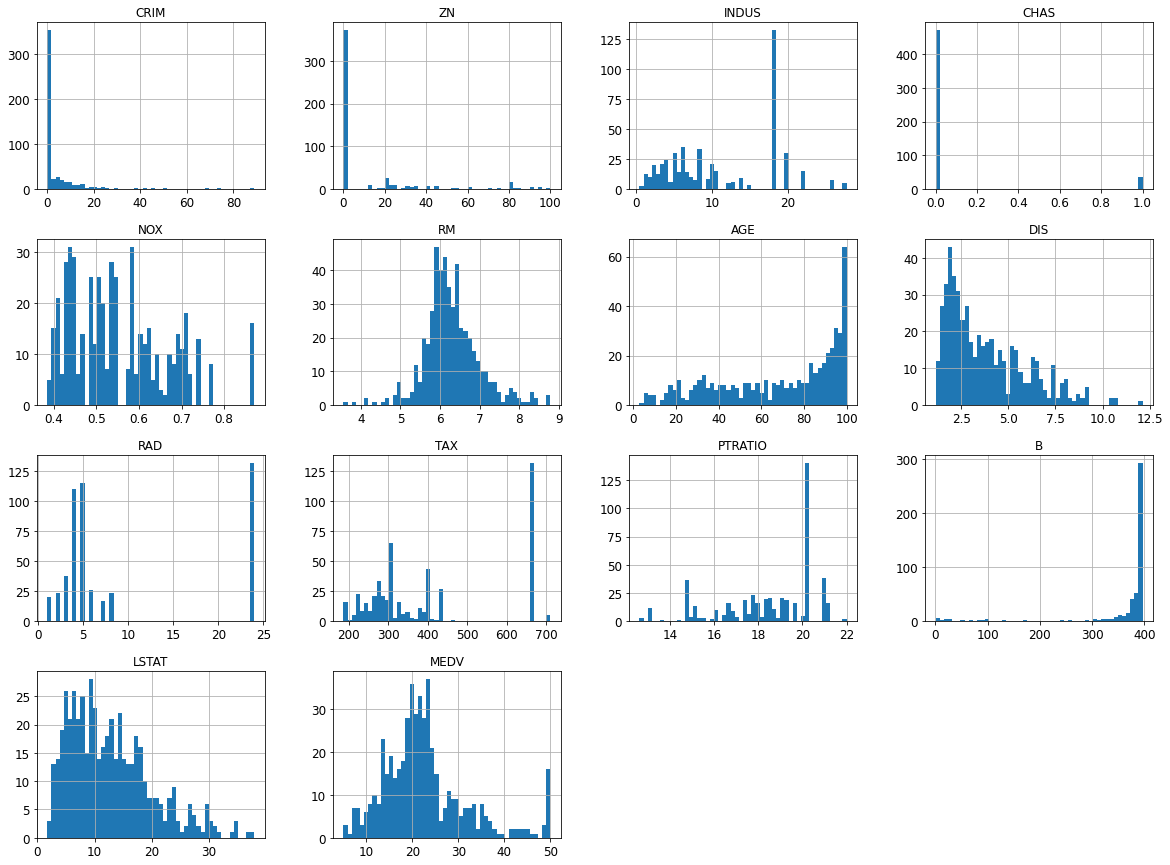

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

4. SEPARANDO O CONJUNTO DE DADOS 

A função  train_test_split  tem a variável shuffle = True como padrão, o que permite embaralhar os dados antes de separar nos conjuntos de treino e teste. Vejamos a medida resumo da média de valores das habitações. Vemos que o valor mediano das casas está entre 13 mil doláres e 31 mil doláres. 

In [ ]:
housing["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

Então é melhor utilizar uma amostra estratificada. Nesse caso, 5 estratos de 9 mil doláres.

In [ ]:
housing["medv_cat"] = pd.cut(housing["MEDV"], 
                               bins=[0, 9, 18, 27, 36, np.inf],
                               labels=[1,2,3,4,5])

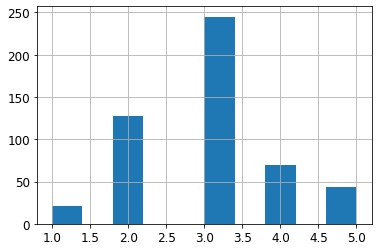

In [ ]:
housing["medv_cat"].hist()

In [ ]:
housing["medv_cat"].value_counts()

3    245
2    128
4     69
5     43
1     21
Name: medv_cat, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)

for train_index, test_index in split.split(housing, housing["medv_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Vejamos se funcionou, olhando a proporção de cada categoria os conjuntos:

In [ ]:
strat_train_set["medv_cat"].value_counts() / len(strat_test_set)

3    1.921569
2    1.000000
4    0.539216
5    0.333333
1    0.166667
Name: medv_cat, dtype: float64

In [ ]:
strat_test_set["medv_cat"].value_counts() / len(strat_test_set) #Proporção de cada categoria em strat_test_set

3    0.480392
2    0.254902
4    0.137255
5    0.088235
1    0.039216
Name: medv_cat, dtype: float64

In [ ]:
housing["medv_cat"].value_counts() / len(housing) #Proporção de cada categoria em housing

3    0.484190
2    0.252964
4    0.136364
5    0.084980
1    0.041502
Name: medv_cat, dtype: float64

Vamos remover o atributo "medv_cat" dos conjuntos strat_train_set e strat_test_set

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("medv_cat", axis=1, inplace=True)

5. VISUALIZANDO OS DADOS 

In [ ]:
housing = strat_train_set.copy() #Importante criar uma cópia! 

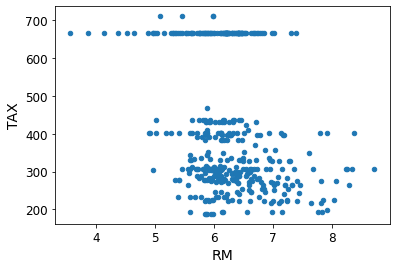

In [ ]:
# Vejamos um gráfico que relaciona "RM" com "TAX".
housing.plot(kind="scatter", x="RM", y="TAX")

Esses dados já sofreram algum tratamento? Há muitas linhas horizontais.

Vejamos a correlação entre as variáveis.

In [ ]:
corr_matrix = housing.corr()
corr_matrix 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.229831,0.470953,-0.053583,0.494745,-0.296291,0.398516,-0.433905,0.719368,0.670963,0.330721,-0.479137,0.527844,-0.412906
ZN,-0.229831,1.000000,-0.529899,-0.038894,-0.513975,0.305802,-0.575976,0.664273,-0.308657,-0.302979,-0.371035,0.177351,-0.393676,0.328748
INDUS,0.470953,-0.529899,1.000000,0.063921,0.771701,-0.400728,0.652145,-0.710744,0.598137,0.726786,0.356289,-0.364951,0.596170,-0.462024
CHAS,-0.053583,-0.038894,0.063921,1.000000,0.082418,0.078810,0.105709,-0.097126,-0.009559,-0.035398,-0.136561,0.072163,-0.061847,0.210127
NOX,0.494745,-0.513975,0.771701,0.082418,1.000000,-0.333332,0.728414,-0.773406,0.614603,0.669651,0.185289,-0.396468,0.597867,-0.432877
RM,-0.296291,0.305802,-0.400728,0.078810,-0.333332,1.000000,-0.254683,0.208213,-0.235706,-0.314703,-0.357910,0.132691,-0.605765,0.693034
AGE,0.398516,-0.575976,0.652145,0.105709,0.728414,-0.254683,1.000000,-0.747733,0.453779,0.502706,0.258183,-0.270718,0.589116,-0.365514
DIS,-0.433905,0.664273,-0.710744,-0.097126,-0.773406,0.208213,-0.747733,1.000000,-0.497788,-0.526477,-0.215836,0.297853,-0.475900,0.227691
RAD,0.719368,-0.308657,0.598137,-0.009559,0.614603,-0.235706,0.453779,-0.497788,1.000000,0.909593,0.463251,-0.459883,0.483946,-0.365624
TAX,0.670963,-0.302979,0.726786,-0.035398,0.669651,-0.314703,0.502706,-0.526477,0.909593,1.000000,0.450254,-0.455591,0.536984,-0.455669


Vemos que crimes estão altamente correlacionados com a acessibilidade à rodovias, o que é esperado. Isso também ocorre entre o número de lotes residenciais e a proximidade aos centros de emprego. Também entre acessibilidade à rodovias e taxa de impostos. 

Vejamos em ordem decrescente quais variáveis estão mais correlacionadas com o rótulo.

In [ ]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.693034
B          0.341094
ZN         0.328748
DIS        0.227691
CHAS       0.210127
AGE       -0.365514
RAD       -0.365624
CRIM      -0.412906
NOX       -0.432877
TAX       -0.455669
INDUS     -0.462024
PTRATIO   -0.485361
LSTAT     -0.735100
Name: MEDV, dtype: float64

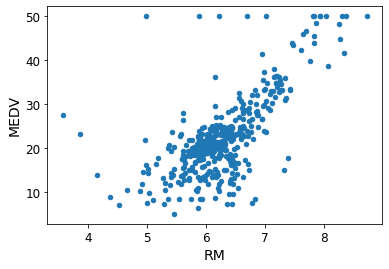

In [ ]:
# visualizando a alta correlação entre "RM" e "MEDV".
housing.plot(kind="scatter", x="RM", y="MEDV")

Vemos que realmente há uma forte correlação entre essas variáveis e um valor limiar de preço médio das habitações igual à 50 mil doláres.

6 PREPARANDO OS DADOS PARA OS ALGORITMOS DE MACHINE LEARNING

In [ ]:
# Retirando o rótulo do conjunto de treino estratificado. Housing agora é o conjunto de treino,
# não todo o dataset!

housing = strat_train_set.drop("MEDV", axis=1) # O método drop cria cópia sem a coluna em questao
housing_labels = strat_train_set["MEDV"].copy() #salvando uma cópia

Já vimos que não há dados faltantes, nem colunas não númericas. Então, vamos pular a etapa de limpeza dos dados. Na etapa de transformação a seguir, vamos apenas escalonar. Para cada feature temos z = (x - u) / s, em que u é a média e s é o desvio padrão (confirmar na documentação).

In [ ]:
#criando a pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  #StandardScaler serve para fazer a reescalar das variáveis

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing)

In [ ]:
housing_num_tr

array([[-0.47379207, -0.47775947, -0.37484936, ...,  1.1237389 ,
         0.43684315, -0.0617388 ],
       [ 1.60188931, -0.47775947,  1.00912364, ...,  0.80136787,
        -3.46117839,  1.1967748 ],
       [-0.48465599,  0.93266773, -1.30039944, ..., -0.02758621,
         0.41996063, -0.81262847],
       ...,
       [-0.31286827, -0.47775947,  1.22382805, ..., -1.73154736,
        -0.67729471,  0.24199186],
       [-0.47536493,  0.05649326, -0.47494804, ..., -1.50128234,
         0.45480788,  0.07887725],
       [-0.13974922, -0.47775947,  1.22382805, ..., -1.73154736,
         0.39864104,  2.36529413]])

# 7. SELECIONAR E TREINAR O MODELO.

In [ ]:
# Regressão linear
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing, housing_labels) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Testando o nosso pipeline de pré-processamento em algumas instâncias de treino.
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data) #Full pipeline

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [40.53265268 29.79142418 53.1876477  55.92660108 29.39132048]


Comparando com os valores reais:

In [ ]:
print("Labels:", list(some_labels))

Labels: [19.8, 17.2, 36.1, 30.8, 21.2]


Agora vamos usar as métricas para saber o quão bom é o nosso modelo.

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

housing_predictions = lin_reg.predict(housing)
lin_mse = MSE(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse) 
lin_rmse

4.715303516024049

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE

lin_mae = MAE(housing_labels, housing_predictions)
lin_mae

3.30836242894764

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state= seed)
tree_reg.fit(housing, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
housing_predictions = tree_reg.predict(housing)
tree_mse = MSE(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse  # erro 0.0 indica ou subajuste ou sobreajuste. Então a árvore de decisão não ajuda aqui.

0.0

# 8. Avaliação do Modelo

Até o momento testando o modelo no mesmo conjunto que treinamos. É melhor realizar a **validação cruzada** dividindo o conjunto de treinamento em k=10 folds, indicada a seguir:

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing, housing_labels,
                         scoring="neg_mean_squared_error", cv=10) 

tree_rmse_scores = np.sqrt(-scores)

In [ ]:
# resultados para árvore de decisão
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [3.37501581 4.11528975 4.91778753 5.64051113 5.28161907 3.78731435
 4.09820082 2.8285597  6.58038753 3.22563947]
Mean: 4.385032517048218
Standard deviation: 1.1306077882144747


In [ ]:
# resultados para regressão linear
lin_scores = cross_val_score(lin_reg, housing, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4.18922765 3.44216806 5.88427832 4.80804251 4.19246146 6.30961717
 4.2096228  4.20564047 5.60417852 5.60880716]
Mean: 4.8454044123207005
Standard deviation: 0.8956889343710904


Vamos agora para o modelo de "Florestas Aleatórias" (random forest)

In [ ]:
#Treinando o modelo
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing, housing_labels) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# Fazendo predições
housing_predictions = forest_reg.predict(housing) 
forest_mse = MSE(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.4788106506899588

In [ ]:
# validação cruzada
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.34658652 3.25070912 3.87557266 4.09558507 2.71702595 3.25328334
 3.18881169 2.57009192 4.65332811 3.2007339 ]
Mean: 3.315172827719633
Standard deviation: 0.6783719304393042


# 9. Ajustando e selecionando o modelo

Agora vamos usar o GridSearch, que utiliza a validação cruzada para avaliar todas as combinações possíveis de hiperparâmetros. Isso no nosso modelo random forest.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=seed)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
#melhor combinação de hiperparâmetros encontrada.
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

# 10. Modelo e teste final

In [ ]:
# teste final do nosso modelo
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

X_test_prepared = num_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = MSE(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

13.20991461432083